Hand Written Digit Prediction Classifications Analysis

In [285]:
import pandas as pd


In [286]:
import numpy as np



In [287]:
import matplotlib.pyplot as plt

import Data

In [288]:
from sklearn.datasets import load_digits


In [289]:
df=load_digits()

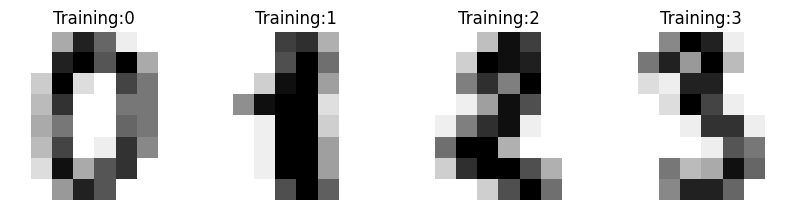

In [290]:
_, axes=plt.subplots(nrows=1,ncols=4,figsize=(10,3))
for ax,image,label in zip(axes,df.images,df.target):
    ax.set_axis_off()
    ax.imshow(image,cmap=plt.cm.gray_r,interpolation="nearest")
    ax.set_title("Training:%i" % label)

Data Processing

Flatten image

In [291]:
df.images.shape

(1797, 8, 8)

In [292]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [293]:
df.images[0].shape

(8, 8)

In [294]:
len(df.images)

1797

In [295]:
n_samples=len(df.images)
data=df.images.reshape((n_samples, -1))

In [296]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [297]:
data[0].shape

(64,)

In [298]:
data.shape

(1797, 64)

Scaling Image Data

In [299]:
data.min()

0.0

In [300]:
data.max()

16.0

In [301]:
data=data/16

In [302]:
data.min()

0.0

In [303]:
data.max()

1.0

In [304]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

Train Test Split Data

In [305]:
from sklearn.model_selection import train_test_split

In [306]:
X_train, X_test,y_train,y_test=train_test_split(data, df.target,test_size=0.3)

In [307]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

Random Forest Model

In [308]:
from sklearn.ensemble import RandomForestClassifier

In [309]:
rf=RandomForestClassifier()

In [310]:
rf.fit(X_train,y_train)

RandomForestClassifier()

Predict Test Data

In [311]:
y_pred=rf.predict(X_test)

In [312]:
y_pred

array([8, 1, 6, 1, 7, 6, 1, 9, 6, 0, 6, 1, 2, 2, 9, 1, 0, 4, 8, 6, 9, 3,
       4, 3, 3, 5, 6, 9, 7, 6, 2, 7, 0, 7, 4, 2, 3, 2, 0, 4, 6, 9, 7, 6,
       5, 7, 1, 6, 4, 0, 8, 2, 9, 3, 9, 8, 5, 5, 2, 6, 0, 1, 1, 8, 2, 8,
       6, 3, 3, 8, 6, 0, 0, 5, 7, 0, 4, 5, 0, 3, 2, 6, 5, 0, 8, 4, 3, 2,
       5, 4, 5, 4, 4, 7, 6, 6, 4, 5, 1, 2, 9, 5, 3, 0, 6, 5, 3, 1, 3, 8,
       5, 5, 9, 7, 8, 7, 8, 0, 2, 7, 0, 9, 6, 6, 9, 8, 6, 0, 8, 1, 3, 5,
       7, 3, 6, 3, 5, 3, 9, 7, 2, 2, 3, 9, 4, 1, 9, 3, 1, 9, 5, 1, 5, 3,
       6, 5, 6, 4, 5, 1, 2, 5, 4, 3, 7, 0, 4, 9, 2, 1, 7, 4, 2, 8, 7, 4,
       1, 5, 5, 7, 5, 0, 7, 5, 4, 7, 7, 7, 0, 0, 3, 6, 4, 0, 9, 3, 5, 4,
       6, 9, 7, 5, 9, 7, 7, 9, 5, 2, 6, 3, 1, 3, 8, 4, 2, 0, 2, 2, 8, 0,
       2, 5, 8, 6, 3, 7, 1, 9, 6, 3, 7, 6, 0, 6, 4, 6, 6, 5, 5, 5, 5, 3,
       2, 5, 5, 7, 9, 0, 2, 1, 3, 2, 4, 3, 4, 3, 1, 7, 7, 8, 9, 5, 1, 9,
       3, 0, 8, 3, 2, 7, 0, 4, 4, 2, 8, 9, 1, 0, 7, 1, 0, 0, 6, 7, 0, 5,
       4, 7, 1, 5, 6, 6, 6, 2, 5, 7, 9, 0, 9, 1, 8,

In [313]:
print(y_test,y_pred)

[8 1 6 1 7 6 1 9 6 0 6 1 2 2 9 1 0 4 8 6 9 3 4 3 3 5 6 9 7 6 2 7 0 7 4 2 3
 2 0 4 6 9 7 6 5 4 1 6 4 0 8 2 9 3 9 8 5 5 2 6 0 1 1 8 2 8 6 3 3 8 6 0 6 5
 7 0 4 5 0 3 2 6 5 0 8 4 3 2 5 4 3 4 4 7 6 6 4 5 1 2 9 9 3 0 6 5 3 1 3 8 5
 5 9 4 8 7 8 0 2 7 0 9 6 6 9 8 6 0 8 1 3 5 7 3 6 3 3 3 9 7 2 2 3 8 4 1 9 3
 1 9 5 1 5 3 6 5 6 4 5 1 2 5 4 3 7 0 4 9 2 1 7 4 2 8 7 4 1 5 5 7 5 0 7 5 4
 7 7 9 0 0 3 6 4 0 9 3 5 4 6 9 7 5 9 7 7 9 5 2 6 3 1 3 8 4 2 0 2 2 8 0 2 5
 8 6 3 7 1 9 6 3 7 6 0 6 4 6 6 3 5 5 5 3 2 5 5 7 9 0 2 1 3 2 4 3 4 3 1 7 7
 8 9 5 8 9 3 0 8 3 2 7 0 4 4 2 8 9 1 0 7 1 0 0 6 7 0 5 4 7 1 5 6 6 6 2 5 7
 9 0 9 1 8 5 1 7 9 9 0 5 4 8 1 6 5 7 7 4 6 0 6 8 4 3 6 7 3 3 2 1 8 7 6 5 4
 2 2 7 7 2 8 5 4 6 7 1 6 0 4 1 2 2 5 2 5 1 0 0 0 4 3 7 0 1 1 8 0 3 3 0 5 7
 7 0 8 5 9 1 2 2 1 4 9 0 5 7 6 8 3 4 9 7 7 6 8 5 4 0 1 3 8 0 6 3 3 2 1 6 6
 7 7 3 0 1 8 4 8 0 4 9 9 8 1 5 2 1 5 7 8 8 6 9 4 0 3 7 2 0 1 6 3 5 2 7 5 1
 2 9 2 0 2 9 7 8 5 6 2 2 5 8 9 1 7 1 2 6 2 0 9 1 2 2 3 5 5 6 9 6 9 5 4 2 4
 9 4 9 5 3 5 6 8 6 9 2 0 